In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import time

# Clastering

### Introduce

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

In [12]:
print(data.target_names)
print(data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Let's **use a model GaussianMixture for clastering instances** (of couse without using labeles)

In [13]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)

y_pred = gm.predict(X)

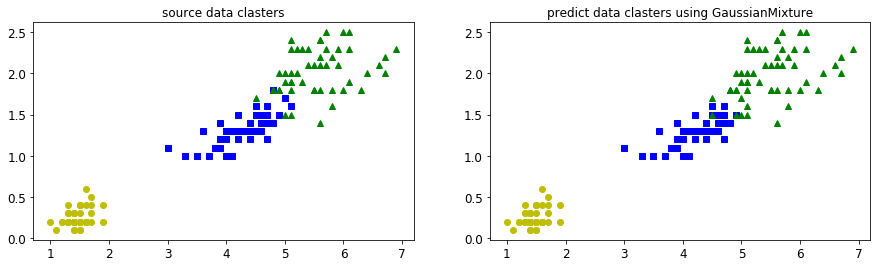

In [22]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Cluster 1")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Cluster 2")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Cluster 3")
plt.title("source data clasters")

plt.subplot(122)
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "bs", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "g^", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "yo", label="Cluster 3")
plt.title("predict data clasters using GaussianMixture")
plt.show()

### K-Means

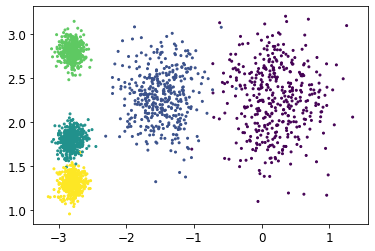

In [25]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]) #centers each of 5 clasters
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) #instances deviation at each claster

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X[:, 0], X[:, 1], s=4, c=y)
plt.show()

Теперь передадим набор данных алгоритму K-Means без лейблов и посмотрим как он справится с кластеризацией

In [26]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [27]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_transform(X)

In [32]:
print(X.shape)
print(y.shape)
print(y_pred.shape)
print(y[10])
print(y_pred[10])

(2000, 2)
(2000,)
(2000, 5)
2
[0.07587694 3.11509214 1.4957606  1.04090204 0.46201421]


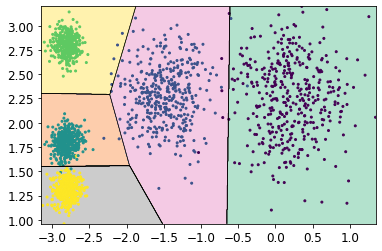

In [37]:
x1 = np.linspace(np.min(X[:, 0]), np.max(X[:,0]), 1000)
x2 = np.linspace(np.min(X[:, 1]), np.max(X[:,1]), 1000)

x1s, x2s = np.meshgrid(x1, x2)
x_new = np.c_[x1s.ravel(), x2s.ravel()]

y_mark = kmeans.predict(x_new).reshape(x1s.shape)

plt.contourf(x1s, x2s, y_mark, cmap="Pastel2")
plt.contour(x1s, x2s, y_mark, colors="black", linewidths=0.5)
plt.scatter(X[:, 0], X[:, 1], s=4, c=y)
plt.show()

Визуально видно, что кол-во ошибок кластеризации не велико.

Из модели kmeans мы можем получить все лейблы (он сохраняет их в модели), центра кластеров

In [10]:
print(y_pred is kmeans.labels_)
print(kmeans.cluster_centers_)

True
[[ 0.20876306  2.25551336]
 [-2.80389616  1.80117999]
 [-1.46679593  2.28585348]
 [-2.79290307  2.79641063]
 [-2.80037642  1.30082566]]


Вывод расстояния экземпляров данных до центров кластеров

In [13]:
kmeans.transform(X[:5])

array([[3.04611916, 0.46779778, 1.54944305, 1.45402521, 0.11146795],
       [3.11541584, 0.07122059, 1.48612753, 0.99002955, 0.51431557],
       [1.32016676, 3.81713488, 2.67154781, 4.09069201, 3.76340605],
       [3.18153989, 0.13643124, 1.55085758, 1.00503563, 0.52058348],
       [2.98883057, 0.14170053, 1.39477359, 1.11490543, 0.39014221]])

Выведем инерцию модели (подробнее в onenote)

In [15]:
kmeans.inertia_

211.5985372581684

n_init укзаывает сколько раз алгоритм будет перезапускаться и заного случайным обазом подбирать центры кластеров. В данном примере я заранее нашел значения random_state, чтобы алгоритм свалился в локальный миниум и используя гиперпараметр n_init=1 не даю ему искать более оптимальное решения. Все ради визуализации результата кластеризации при попадании в локальный миниум.

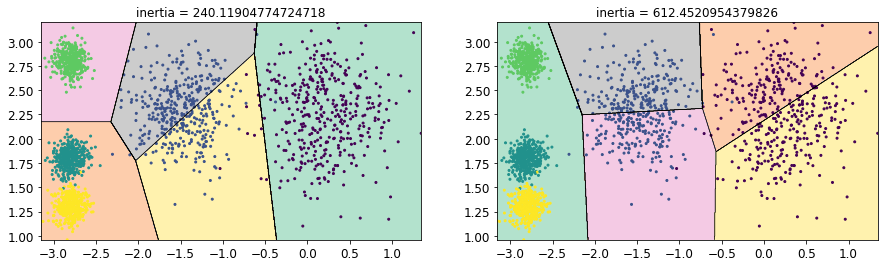

In [47]:
randoms = {("121", 50), ("122", 1300)}
plt.figure(figsize=(15, 4))

for rand in randoms:
    plt.subplot(rand[0])
    kmeans_ = KMeans(n_clusters=k, n_init=1, random_state=rand[1])
    kmeans_.fit(X)
    y_mark_ = kmeans_.predict(x_new).reshape(x1s.shape)
    plt.contourf(x1s, x2s, y_mark_, cmap="Pastel2")
    plt.contour(x1s, x2s, y_mark_, colors="black", linewidths=0.5)
    plt.scatter(X[:, 0], X[:, 1], s=4, c=y)
    plt.title("inertia = {}".format(kmeans_.inertia_))

plt.show()

Если мы случайно узнали примерное расположение локальных минимумов, то можно помочь алгоритму не свалиться в локальный минимум (будет использовать плохое значение random_state)

In [51]:
good_init = np.array(
    [[ 0,  2],
     [-2,  2],
     [-3,  2],
     [-3,  3],
     [-3,  1]])

kmeans_ = KMeans(n_clusters=k, init=good_init, n_init=1, random_state=1300)
kmeans_.fit(X)
print("inertia:", kmeans_.inertia_)

inertia: 211.5985372581684


### Accelerated K-Means and Mini-batch K-Means

**using  Charles Elkan method**

In [25]:
pt = time.time()
kmeans = KMeans(n_clusters=k, algorithm='full', random_state=42)
kmeans.fit(X)
print("full took: {:.4} sec.".format(time.time() - pt))
print(kmeans.inertia_)

full took: 0.08241 sec.
211.59853725816822


In [26]:
pt = time.time()
kmeans = KMeans(n_clusters=k, algorithm='elkan', random_state=42)
kmeans.fit(X)
print("elkan took: {:.4} sec.".format(time.time() - pt))
print(kmeans.inertia_)

elkan took: 0.06513 sec.
211.5985372581684


In [27]:
pt = time.time()
kmeans = KMeans(n_clusters=k, algorithm='auto', random_state=42)
kmeans.fit(X)
print("auto took: {:.4} sec.".format(time.time() - pt))
print(kmeans.inertia_)

auto took: 0.06538 sec.
211.5985372581684


**using MiniBatchMeans**

In [29]:
from sklearn.cluster import MiniBatchKMeans

pt = time.time()
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)
print("MiniBatchKMeans took: {:.4} sec.".format(time.time() - pt))
print(minibatch_kmeans.inertia_)

MiniBatchKMeans took: 0.04755 sec.
213.2530781285407


**MiniBatchMeans using partial_fit**

In [37]:
def load_next_batch(batch_size, arr):
    return arr[np.random.choice(len(arr), batch_size, replace=False)]

In [ ]:
n_init = 10 #аналогичный гиперпараметр для KMeans
n_iterations = 100 #кол-во итераций обучения на отдельных mini-batch данных
batch_size = 100 #размер данных для обучения на каждой итерации (размер mini-batch)
init_size = 500  #Для инициализации алгоритма лучше подать больше данных
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size, X)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size, X)
        minibatch_kmeans.partial_fit(X_batch)
        #суммарная инерация расчитывается суммируя инерции модели на шагах (90...99)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

### Finding the Optimal Number of Clusters

**using the "elbow rule"**

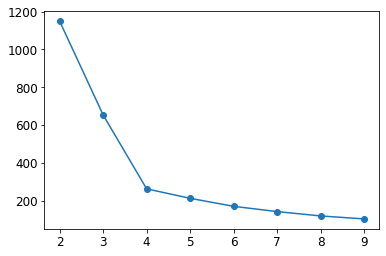

In [19]:
inertias = list()

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
inertias = np.c_[np.arange(2, 10), inertias]
plt.plot(inertias[:, 0], inertias[:, 1])
plt.scatter(inertias[:, 0], inertias[:, 1])

k=4 представляет собой оптимальную точку, т.к. после нее увеличение кол-ва центроидов не приводит к существенному сокращению инерции

**using silhouette_score***

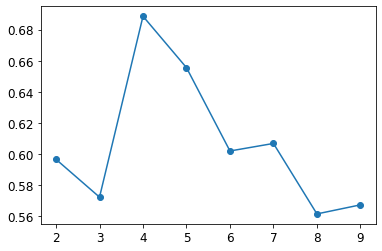

In [21]:
from sklearn.metrics import silhouette_score

scores = list()

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))
    
scores = np.c_[np.arange(2, 10), scores]
plt.plot(scores[:, 0], scores[:, 1])
plt.scatter(scores[:, 0], scores[:, 1])

k=4 и k=5 хорошие точки. В предыдущем методе не видно, но эти точки существенно лучше 6, 7...

### Using clustering for image segmentation

In [3]:
import urllib

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f331eedddd8>)

(533, 800, 3)


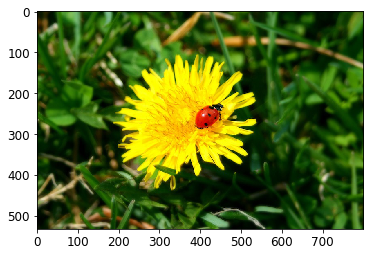

In [4]:
from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))
print(image.shape)
plt.imshow(image)

Применим алгоритм K-Means, чтобы выделить n кластеров и усреднить цвета всех пикселов в кластере

In [ ]:
from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

In [26]:
print("image shape:", image.shape)
X = image.reshape(-1,3) #array 533*800 where each instance is vector of colors (3 dimention of colors)
print("image shape after reshape:", X.shape)

kmeans = KMeans(n_clusters=8).fit(X)

image shape: (533, 800, 3)
image shape after reshape: (426400, 3)


In [27]:
#Для каждого пиксела из кластера присваиватеся цвет, центра кластера
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

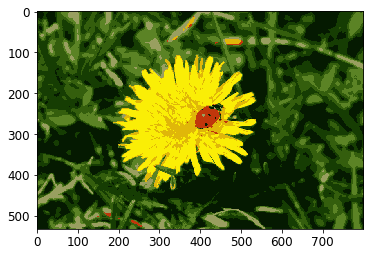

In [28]:
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

### Using Clustering for Preprocessing



In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

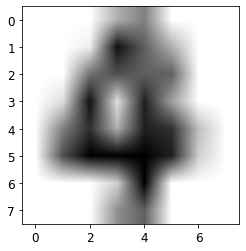

In [57]:
some_digit = X_train[0].reshape(8,8)
plt.imshow(some_digit, cmap="binary", interpolation="bilinear")

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42, n_jobs=-1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("error:", mean_squared_error(y_test, y_pred))

accuracy: 0.9688888888888889
error: 0.7466666666666667


Now we going to use K-Means

In [11]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=40)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42, n_jobs=-1))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("error:", mean_squared_error(y_test, y_pred))

accuracy: 0.9888888888888889
error: 0.33555555555555555


Let's use GridSearchCV to find the best value of k

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:  7.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=40, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                    

In [64]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 86}
0.9844444444444445


### Using Clustering for Semi-Supervised Learning 

In [102]:
n_labeled = 50
reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42, max_iter=5000)
reg.fit(X_train[:n_labeled], y_train[:n_labeled])
reg.score(X_test, y_test)

0.7888888888888889

Попробуем улучшить этот показатель применив алгоритм K-Means для кластеризации тренировочного набора и присвоения всем экземплярам в кластере значения, близкого к центроиду.

In [133]:
k=50
kmeans = KMeans(n_clusters=k)
x_digits_dist = kmeans.fit_transform(X_train)
#В итоге получаем массив из 50 избранных экземпляров (индексов их расположения 
#в обучающем наборе), которые находятся максимально близко к центру их кластера.
representative_idxs = np.argmin(x_digits_dist, axis=0)
#а это уже непосредственно экземпляры
x_representative_digits = X_train[representative_idxs]

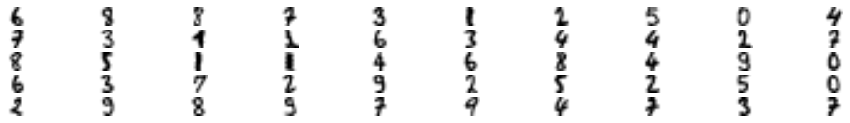

In [134]:
plt.figure(figsize=(16, 2))
for index, im in enumerate(x_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(im.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [139]:
y_representative_digits = np.array([
    6,8,8,7,3,1,2,5,0,4,
    7,3,1,1,6,3,4,4,2,7,
    8,5,1,1,4,6,8,4,9,0,
    6,3,7,2,9,2,5,2,5,0,
    2,9,8,9,7,9,4,7,3,7
])

теперь обучим модель на наборе из 50 элементов,но изображения цифр из представительного набора, кот. является центрами своих кластеров

In [140]:
reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42, max_iter=5000)
reg.fit(x_representative_digits, y_representative_digits)
reg.score(X_test, y_test)

0.9355555555555556

c 78.9% удалось улучшить производительность до 93,6%

Теперь попробуем назначить всем экземплярам в кластера одинаковые значения

In [142]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42, max_iter=5000)
reg.fit(X_train, y_train_propagated)
reg.score(X_test, y_test)

0.9355555555555556

Попробуем назначать значения не всему обучающему набору, а только объектам расположенным близко к центру кластера, их будет существенно меньше, но вероятность ошибки резко снижается, т.к. мы не будем трогать экземпляры находящиеся на границах кластера

In [161]:
percentile_closest = 10 #np.percentile вовращает в данном случае число, меньше которого не более 10% данных

#расстояния каждого экземпляра до центра своего кластера
X_cluster_dist = x_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i) #true где объект входит в кластер i
    cluster_dist = X_cluster_dist[in_cluster] #массив растояний до центра кластера из объектов этого кластера
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) #значение, меньше которого 10% данных
    above_cutoff = (X_cluster_dist > cutoff_distance) #true для экземпляров которые находятся слишком далеко от центра кластера
    X_cluster_dist[in_cluster & above_cutoff] = -1 # экземплярам на границах кластера присваивается -1
    partially_propagated = (X_cluster_dist != -1)
    #исключаем из обучающего набора данные, расположенные на границах
    X_train_partially_propagated = X_train[partially_propagated]
    y_train_partially_propagated = y_train_propagated[partially_propagated]

In [162]:
reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42, max_iter=5000)
reg.fit(X_train_partially_propagated, y_train_partially_propagated)
reg.score(X_test, y_test)

0.9444444444444444

Лучше чем в предыдущем случае. Тестирование показывает что лучший результат с percentile_closest = 10

In [163]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

1.0

в данном случае, значения, которые были назначены объектам одного кластера совпадают 100% с соответствующими лейблами в обучающем наборе (в книге это 99%)

### DBSCAN

In [164]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05)

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

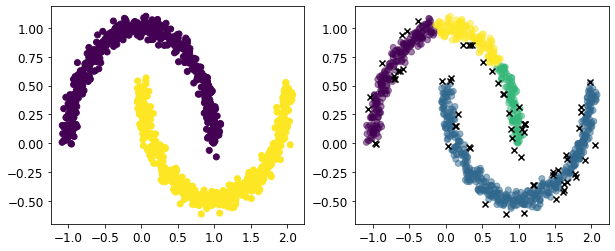

In [219]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.subplot(122)
plt.scatter(X[dbscan.labels_!=-1][:, 0], #кластеры
            X[dbscan.labels_!=-1][:, 1], 
            c=dbscan.labels_[dbscan.labels_ >= 0], alpha=0.5)
plt.scatter(X[dbscan.labels_==-1][:, 0], #аномалии
            X[dbscan.labels_==-1][:, 1], 
            c='k', marker='x')

Результат так себе: слишком много аномалий и 4 различных кластера, нужно увеличить параметр отвечающий за размер области, определющих окресности экземпляра, являющегося ядром. А пока посмотрим на некоторые данные

In [207]:
print(len(dbscan.core_sample_indices_)) #индексы экземпляров являющихся core instances
print(dbscan.components_[:10]) #core instances

828
[[-1.0338941   0.22203179]
 [-0.01915467  0.29285186]
 [ 0.9516301   0.10992815]
 [ 0.5914171   0.75278637]
 [ 1.95175926  0.13664372]
 [ 1.18649967 -0.51272982]
 [ 0.67752438  0.72069737]
 [ 0.98288207 -0.50239863]
 [ 0.66113536  0.73630436]
 [-0.01254284  0.96912031]]


увеличим значение e (эпсилон), чтобы получить 2а кластера и уменьшить кол-во аномалий

anomalies: 0


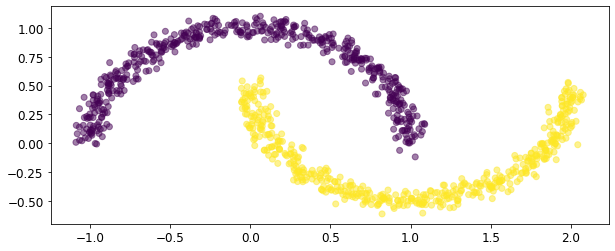

In [248]:
dbscan = DBSCAN(eps=0.12, min_samples=5)
dbscan.fit(X)

plt.figure(figsize=(10, 4))

plt.scatter(X[dbscan.labels_!=-1][:, 0], #кластеры
            X[dbscan.labels_!=-1][:, 1], 
            c=dbscan.labels_[dbscan.labels_ >= 0], alpha=0.5)

anomaly_count = np.sum(dbscan.labels_==-1) #получим массив аномалий
print("anomalies:", anomaly_count)

plt.scatter(X[dbscan.labels_==-1][:, 0], #аномалии
            X[dbscan.labels_==-1][:, 1], 
            c='k', marker='x')

plt.show()

**using KNeighborsClassifier with K-Means**

т.к. K-Means не имеет метода predict и, соответственно, не позволяет оценить принадлежность к кластеру новых данных, то для этого будет использоваться KNeighborsClassifier

In [256]:
from sklearn.neighbors import KNeighborsClassifier

dbscan = DBSCAN(eps=0.12, min_samples=5)
y_pred = dbscan.fit_predict(X)

knclf1 = KNeighborsClassifier(n_neighbors=50)
knclf1.fit(X, y_pred)
knclf1.score(X, y_pred)

1.0

Аналогично, но будут использовать только ядра

In [260]:
from sklearn.neighbors import KNeighborsClassifier

knclf2 = KNeighborsClassifier(n_neighbors=50)
knclf2.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
knclf2.score(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

1.0

In [263]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
y_pred1 = knclf1.predict(X_new)
y_pred2 = knclf2.predict(X_new)
print(y_pred1)
print(y_pred2)
y_pred1 = knclf1.predict_proba(X_new)
y_pred2 = knclf2.predict_proba(X_new)
print(y_pred1)
print(y_pred2)

[0 1 0 1]
[0 1 0 1]
[[0.76 0.24]
 [0.   1.  ]
 [0.86 0.14]
 [0.   1.  ]]
[[0.76 0.24]
 [0.   1.  ]
 [0.84 0.16]
 [0.   1.  ]]


Построим график границы решений, определенные с помощью KNeighborsClassifier

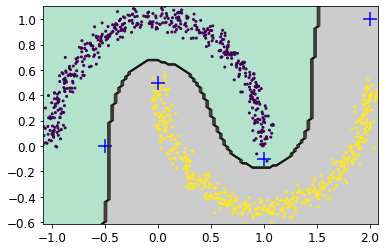

In [278]:
x1 = np.linspace(np.min(X[:, 0]), np.max(X[:,0]), 100)
x2 = np.linspace(np.min(X[:, 1]), np.max(X[:,1]), 100)

x1s, x2s = np.meshgrid(x1, x2)
x_new = np.c_[x1s.ravel(), x2s.ravel()]

y_mark = knclf1.predict(x_new).reshape(x1s.shape)

plt.contourf(x1s, x2s, y_mark, cmap="Pastel2")
plt.contour(x1s, x2s, y_mark, colors="black", linewidths=0.5)
plt.scatter(X[:, 0], X[:, 1], s=4, c=y)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

как видно из диаграммы выше KNeighborsClassifier всегда делает предсказание, Как бы далеко данные не находились от кластера. Однако, чтобы изменить расстояние можно воспользоваться фукнцией-членом kneighbors

- y_dist - расстояние экземпляра до ближайших k соседей
- y_pred_idx - инексы экземпляров, до кот. вычислялось расстояние

In [301]:
y_dist, y_pred_idx = knclf1.kneighbors(X_new, n_neighbors=1)
print("Расстояние до ближайшего соседа:")
for i in range(len(X_new)):
    print("instance {}\thas neighbor dist {}".format(X_new[i], y_dist[i]))

Расстояние до ближайшего соседа:
instance [-0.5  0. ]	has neighbor dist [0.4037571]
instance [0.  0.5]	has neighbor dist [0.02110615]
instance [ 1.  -0.1]	has neighbor dist [0.03476459]
instance [2. 1.]	has neighbor dist [0.47339761]


In [302]:
print("test")

test


In [303]:
print("fsdl;fkasdf")

fsdl;fkasdf
